## Sentiment Analysis for Combined Election Data


In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')

#from nltk.stem import PorterStemmer
import nltk.corpus
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import string
import matplotlib.pyplot as plt


!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_Peter = pd.read_excel('PeterObi.xlsx', names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at']) 

In [ ]:
df_Atiku = pd.read_excel('AtikuAbubakar.xlsx', names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at']) 


In [ ]:
df_Tinubu = pd.read_excel('BolaTinubu.xlsx', names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at']) 


In [ ]:
df = pd.concat([df_Atiku, df_Peter, df_Tinubu], names=['hashtags', 'text','user', 'user_location','source_device', 'user_created_at','user_followers_count','user_following_count','user_verified','tweet_place','tweet_geo','tweet_created_at'])




In [ ]:
df

,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at
0,[],RT @Rasheethe: FLASH: The PPD Presidential Can...,Astambaya,"Gusau, Kaduna, Nigeria","<a href=""http://twitter.com/download/android"" ...",Mon Apr 01 19:12:52 +0000 2013,4427.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:43 +0000 2022
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],"RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...",AothmanL,"Gusau, Nigeria Lome","<a href=""http://twitter.com/download/iphone"" r...",Fri Apr 06 13:17:47 +0000 2012,489.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:49 +0000 2022
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],RT @IAOkowa: Alongside our Presidential Candid...,am_BinHamzat,Nigeria,"<a href=""http://twitter.com/download/android"" ...",Wed Dec 04 13:30:27 +0000 2019,5813.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:53 +0000 2022
...,...,...,...,...,...,...,...,...,...,...,...,...
414641,[],"RT @thecableng: â€˜Present Tinubu for debates,...",Concept_7318,"East, England","<a href=""http://twitter.com/download/android"" ...",Sat Jan 22 21:01:14 +0000 2022,30.0,NaN,0.0,NaN,NaN,Thu Dec 15 02:36:43 +0000 2022
414642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414643,[],@tundebucknor @mrlurvy Lagos blueprint wasnâ€™...,Ifedi_Gunner,Nigeria,"<a href=""http://twitter.com/download/iphone"" r...",Mon Feb 12 17:11:04 +0000 2018,472.0,NaN,0.0,NaN,NaN,Thu Dec 15 02:36:47 +0000 2022
414644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
textcombined = df['text'].dropna()

In [ ]:
textcombined

0         RT @Rasheethe: FLASH: The PPD Presidential Can...
2         RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...
4         RT @IAOkowa: Alongside our Presidential Candid...
6         RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...
8         via @Naija_PR: Atiku Abubakar, Bukola Saraki a...
                                ...                        
414637    This is The Marina Blue Line train station tak...
414639    RT @DeeOneAyekooto: Tinubuâ€™s EKO ATLANTIC CI...
414641    RT @thecableng: â€˜Present Tinubu for debates,...
414643    @tundebucknor @mrlurvy Lagos blueprint wasnâ€™...
414645    RT @Tinubufrontier: FACT CHECK:_x000D_\nVERDIC...
Name: text, Length: 699967, dtype: object

In [ ]:
df_text = textcombined.to_frame
gh = textcombined.to_frame()


In [ ]:
gh

,text
0,RT @Rasheethe: FLASH: The PPD Presidential Can...
2,"RT @Naija_PR: Atiku Abubakar, Bukola Saraki an..."
4,RT @IAOkowa: Alongside our Presidential Candid...
6,"RT @Naija_PR: Atiku Abubakar, Bukola Saraki an..."
8,"via @Naija_PR: Atiku Abubakar, Bukola Saraki a..."
...,...
414637,This is The Marina Blue Line train station tak...
414639,RT @DeeOneAyekooto: Tinubuâ€™s EKO ATLANTIC CI...
414641,"RT @thecableng: â€˜Present Tinubu for debates,..."
414643,@tundebucknor @mrlurvy Lagos blueprint wasnâ€™...


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"@([a-zA-Z0-9_]{1,50})",'',str(text))

    
    return text

In [ ]:
def clean_textC(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[ðŸâ€]', '', text)
    text = re.sub(r'[â€™â€¦]', '', text)
    text = re.sub('tâ', '', text)
    text = re.sub('x9', '', text)
    text = re.sub('ÿ', '', text)
    text = re.sub(r'[â€™]', '', text)
    text = re.sub(r'[œðŸ]', '', text)
    text = re.sub(r'[ðŸ‘‡ðŸ‘‡ðŸ¤ŒðŸ“¢ðŸ•Šï]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"@([a-zA-Z0-9_]{1,50})",'',str(text))

    return text

In [ ]:
def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

 
 

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)


  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

  

  for word in Tokens:
    if word not in stop_words:
      Processed_Text.append(Lemmatizer.lemmatize(word))

 

 

  return(" ".join(Processed_Text))

 

 

  return Text

 


In [ ]:
#applying function to data
gh["text"]= gh["text"].apply(lambda text: clean_textC(text))


In [ ]:
gh

,text
0,rasheethe flash the ppd presidential candidat...
2,naijapr atiku abubakar bukola saraki and gove...
4,iaokowa alongside our presidential candidate ...
6,naijapr atiku abubakar bukola saraki and gove...
8,via naijapr atiku abubakar bukola saraki and g...
...,...
414637,this is the marina blue line train station tak...
414639,deeoneayekooto tinubus eko atlantic city bubb...
414641,thecableng ˜present tinubu for debates bullyi...
414643,tundebucknor mrlurvy lagos blueprint wasnt tin...


In [ ]:
gh["text"].head(15)

0      rasheethe flash the ppd presidential candidat...
2      naijapr atiku abubakar bukola saraki and gove...
4      iaokowa alongside our presidential candidate ...
6      naijapr atiku abubakar bukola saraki and gove...
8     via naijapr atiku abubakar bukola saraki and g...
10     naijapr atiku abubakar bukola saraki and gove...
12     iaokowa alongside our presidential candidate ...
14      what some nigerians are yet to realize is th...
16     ikukuomac what is godwin obaseki going to tel...
18     naijapr atiku abubakar bukola saraki and gove...
20    again his excellency atiku abubakar stops over...
22     theoabuagada if nigerians elect me the minist...
24     naijapr atiku abubakar bukola saraki and gove...
26     ikukuomac what is godwin obaseki going to tel...
28                           atiku arrive jigawa state 
Name: text, dtype: object

In [ ]:
gh["text"]= gh["text"].apply(lambda Text: Text_Processing(Text))

In [ ]:
gh

,text,polarity
0,rasheethe flash ppd presidential candidate ati...,neutral
2,naijapr atiku abubakar bukola saraki governor ...,neutral
4,iaokowa alongside presidential candidate alhaj...,neutral
6,naijapr atiku abubakar bukola saraki governor ...,neutral
8,via naijapr atiku abubakar bukola saraki gover...,neutral
...,...,...
414637,marina blue line train station taking shape ti...,neutral
414639,deeoneayekooto tinubus eko atlantic city bubbl...,neutral
414641,thecableng ˜present tinubu debate bullying med...,negative
414643,tundebucknor mrlurvy lagos blueprint wasnt tin...,neutral


In [ ]:
gh["text"]

0         rasheethe flash ppd presidential candidate ati...
2         naijapr atiku abubakar bukola saraki governor ...
4         iaokowa alongside presidential candidate alhaj...
6         naijapr atiku abubakar bukola saraki governor ...
8         via naijapr atiku abubakar bukola saraki gover...
                                ...                        
414637    marina blue line train station taking shape ti...
414639    deeoneayekooto tinubus eko atlantic city bubbl...
414641    thecableng ˜present tinubu debate bullying med...
414643    tundebucknor mrlurvy lagos blueprint wasnt tin...
414645    tinubufrontier fact based investigation daily ...
Name: text, Length: 699967, dtype: object

In [ ]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score["compound"]


In [ ]:
gh["polarity"]=gh["text"].apply(sentiment_analyzer_scores)

In [ ]:
def sentiment_col(y):
    if y >= 0.05 :
        return 'positive'
    elif y > -0.05 <0.05 :
        return 'neutral'
    elif y <= 0.05:
        return 'negative'


In [ ]:
gh['polarity'] = gh['polarity'].apply(sentiment_col)

In [ ]:
gh['polarity']

0          neutral
2          neutral
4          neutral
6          neutral
8          neutral
            ...   
414637     neutral
414639     neutral
414641    negative
414643     neutral
414645    positive
Name: polarity, Length: 699967, dtype: object

Plot PieChart for Sentiments Analysis Using Vader Lexicon

In [ ]:
polCom=gh['polarity'].groupby(gh['polarity']).size().reset_index(name='count')

polCom.head(15)
polCom=polCom.iloc[:60,::]
polCom

,polarity,count
0,negative,189888
1,neutral,226099
2,positive,283980


In [ ]:
polCom=gh['polarity'].groupby(gh['polarity']).size().reset_index(name='count')

polCom.head(15)
polCom=polCom.iloc[:60,::]
polCom

,polarity,count
0,negative,189888
1,neutral,226099
2,positive,283980


In [ ]:
polarity=polCom['polarity']
TotalPol=polCom['count']
explode=[0.1,0.1,0.1]
#colors = ['lightcoral', 'lightblue', 'lightgreen']

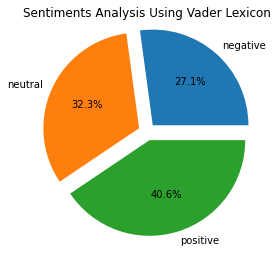

In [ ]:
plt.pie(TotalPol, labels = polarity, radius=1.1,  autopct='%2.1f%%', explode=explode)
plt.title('Sentiments Analysis Using Vader Lexicon')
#plt.legend(labels)
plt.show()

In [ ]:

import seaborn as sns
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
import random
dfC = gh.groupby('polarity').size().reset_index(name='coun')
n = dfC['polarity'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(1000)
c = random.choices(all_colors)


Text(0.5, 1.0, 'Sentiment Analysis for Combined Election Data')

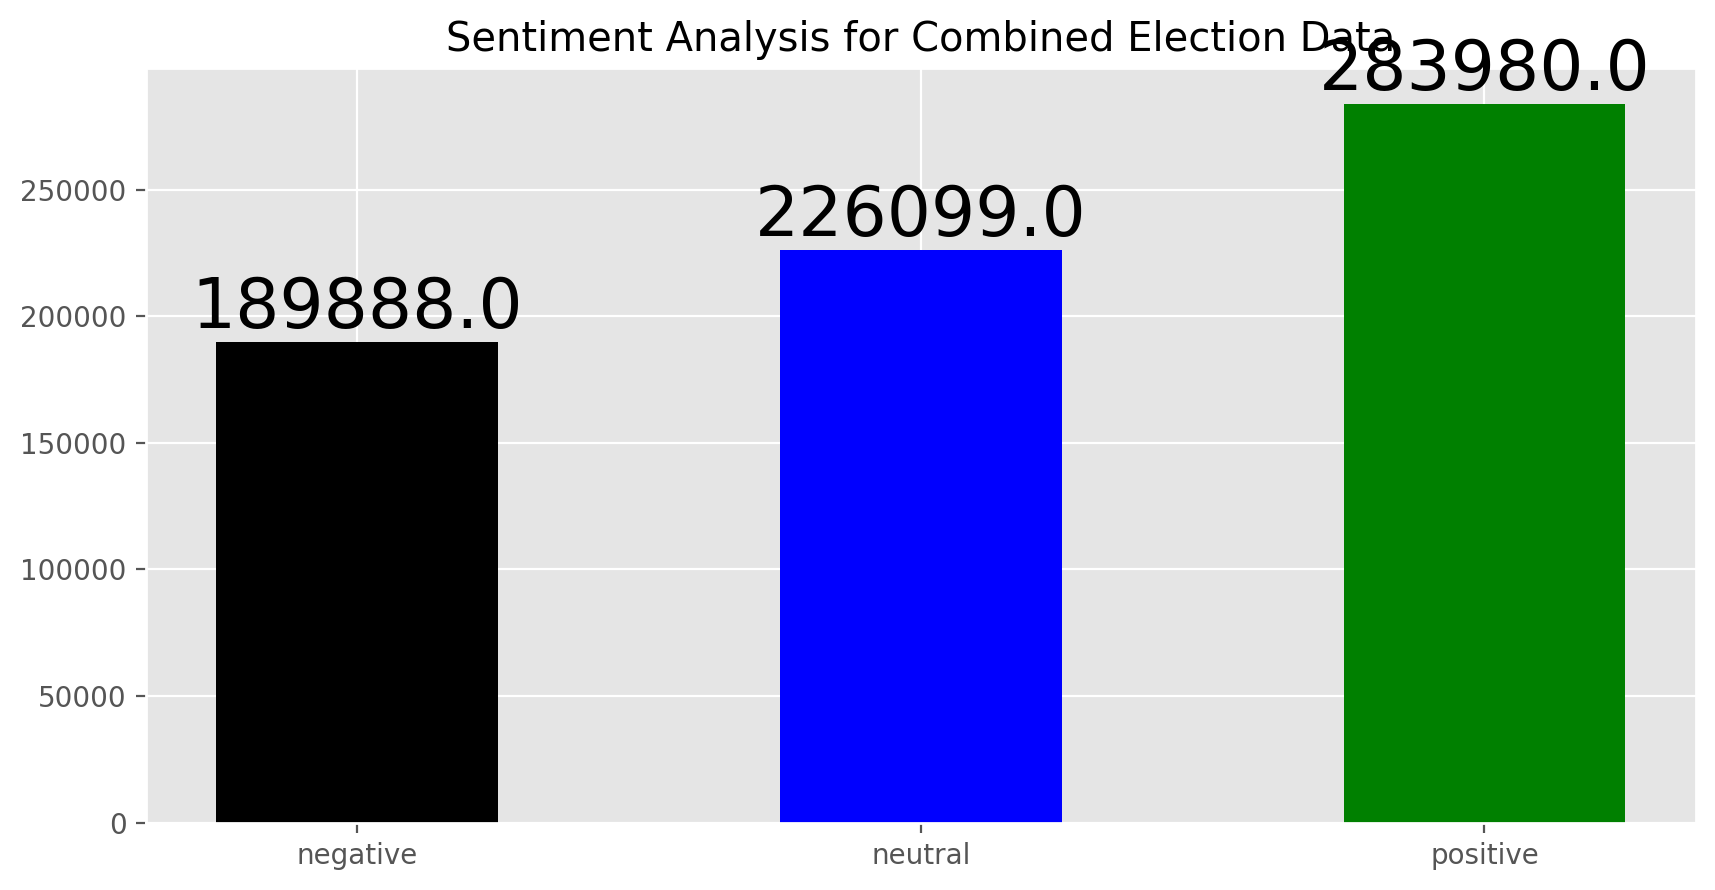

In [ ]:
# Plot Bars
plt.figure(figsize=(10,5), dpi= 200)
plt.bar(dfC['polarity'], dfC['coun'], color=['black', 'blue', 'green'], width=.5)
for i, val in enumerate(dfC['coun'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':25}) 

plt.title('Sentiment Analysis for Combined Election Data')

In [ ]:
#WORD CLOUD AND FREQUENCY DISTRIBUTION
from nltk.tokenize import word_tokenize
pos_tweet = gh[gh.polarity == 'positive']
text = ' '.join([word for word in pos_tweet['text']])
corpus = text

<class 'list'>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
ive
read
apc
manifesto
question
want
ask
tinubu
identity
narcotic
eyyah
told
tinubu
translate
arabic
english
ganduje
amp
adamu
trying
help
ever
angry
l
stearsinsights
neither
atikus
tinubus
manifesto
inspires
confidence
either
candidate
steer
nigeria
right
directi
sodiqtade
source
confirmed
tinubu
others
happy
yesterday
kaduna
turnout
boy
plannin
emmaikumeh
apc
minna
rally
cut
sho
tinubu
rushed
stage
health
sympathy
tinubu
pls
hope
take
good
car
omoelerinjare
peter
obi
pretending
always
passionate
nigerian
youth
excel
e
lmao
man
want
become
president
god
forbid
jajaphd
dream
leader
atiku
tinubu
obi
kwankwaso
make
choice
now‰
fifaworldcup¯¯¯
tinubu
vonbismack
may
god
save
u
emmaikumeh
south
sudan
president
peed
commissioning
road
vote
tinubu
chance
happening
saheedadesope
campaign
back
back
daily
meeting
outreach
asiwaju
missed
healthy
omoelerinjare
peter
obi
pretending
always
passionate
nigerian
youth
excel
e
eduhandsome
gotten
pvc
’
³

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



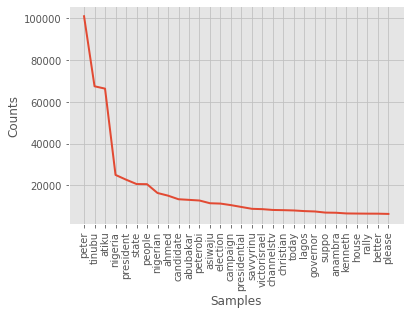

In [ ]:
sentences = nltk.sent_tokenize(corpus)

print(type(sentences))

sentence_tokens = ""
for sentence in sentences:
    sentence_tokens += sentence
    


#word tokenization

words=nltk.word_tokenize(sentence_tokens)
print(words)
for word in words:
    print(word)
    

from nltk.corpus import stopwords
print(stopwords.words('english'))

#stop word removal
stop_words = set(stopwords.words('english'))
filtered_words=[]

for w in words:
    if w not in stop_words:
        filtered_words.append(w)

print('/n With stop words:', words)
print('/n After removing stop words:', filtered_words)


#finding the frequency distribution of words
frequency_dist = nltk.FreqDist(filtered_words)

#SORTING THE FREQUENCY DISTRIBUTION
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

#Keeping only the large words(more than 3 characters)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len (k)>4])

frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30, cumulative=False)

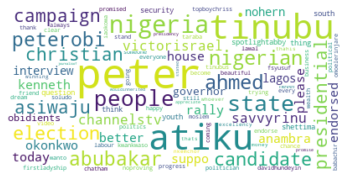

In [ ]:
#Visualising the distribution of words using matplotlib and wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

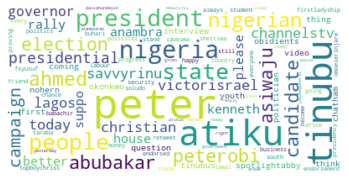

In [ ]:
#Visualising the distribution of words using matplotlib and wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

WORD CLOUD AND FREQUENCY DISTRIBUTION FOR NEGATIVE SENTIMENT

In [ ]:
#WORD CLOUD AND FREQUENCY DISTRIBUTION
from nltk.tokenize import word_tokenize
neg_tweet = gh[gh.polarity == 'negative']
text = ' '.join([word for word in neg_tweet['text']])
corpus = text

<class 'list'>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
ive
read
apc
manifesto
question
want
ask
tinubu
identity
narcotic
eyyah
told
tinubu
translate
arabic
english
ganduje
amp
adamu
trying
help
ever
angry
l
stearsinsights
neither
atikus
tinubus
manifesto
inspires
confidence
either
candidate
steer
nigeria
right
directi
sodiqtade
source
confirmed
tinubu
others
happy
yesterday
kaduna
turnout
boy
plannin
emmaikumeh
apc
minna
rally
cut
sho
tinubu
rushed
stage
health
sympathy
tinubu
pls
hope
take
good
car
omoelerinjare
peter
obi
pretending
always
passionate
nigerian
youth
excel
e
lmao
man
want
become
president
god
forbid
jajaphd
dream
leader
atiku
tinubu
obi
kwankwaso
make
choice
now‰
fifaworldcup¯¯¯
tinubu
vonbismack
may
god
save
u
emmaikumeh
south
sudan
president
peed
commissioning
road
vote
tinubu
chance
happening
saheedadesope
campaign
back
back
daily
meeting
outreach
asiwaju
missed
healthy
omoelerinjare
peter
obi
pretending
always
passionate
nigerian
youth
excel
e
eduhandsome
gotten
pvc
’
³

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



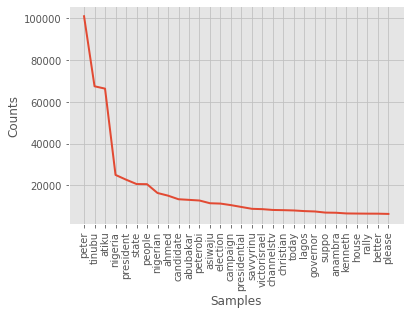

In [ ]:
sentences = nltk.sent_tokenize(corpus)

print(type(sentences))

sentence_tokens = ""
for sentence in sentences:
    sentence_tokens += sentence
    


#word tokenization

words=nltk.word_tokenize(sentence_tokens)
print(words)
for word in words:
    print(word)
    

from nltk.corpus import stopwords
print(stopwords.words('english'))

#stop word removal
stop_words = set(stopwords.words('english'))
filtered_words=[]

for w in words:
    if w not in stop_words:
        filtered_words.append(w)

print('/n With stop words:', words)
print('/n After removing stop words:', filtered_words)


#finding the frequency distribution of words
frequency_dist = nltk.FreqDist(filtered_words)

#SORTING THE FREQUENCY DISTRIBUTION
sorted(frequency_dist,key=frequency_dist.__getitem__,reverse=True)[0:30]

#Keeping only the large words(more than 3 characters)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len (k)>4])

frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30, cumulative=False)

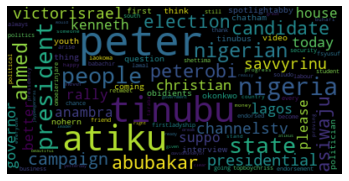

In [ ]:
#Visualising the distribution of words using matplotlib and wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#**APPLYING MACHINE LEARNING TO TWEETS**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
#from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
 

#from nltk.stem import PorterStemmer
import nltk.corpus
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from sklearn.metrics import accuracy_score 
from sklearn.feature_extraction.text import TfidfVectorizer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

 

In [ ]:
# Convert the text data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(gh["text"])
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,gh['polarity'], test_size=0.2)


#Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

# load your twitter dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(gh["text"])
 

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,gh['polarity'], test_size=0.2)


In [ ]:
# fit the model on the training data
nb.fit(X_train, y_train)
    
# make predictions on the test data
y_pred = nb.predict(X_test)

# calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
# append the metrics to the lists
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)

# print the average performance metrics
print("Accuracy:", np.mean(accuracies))
print("Precision:", np.mean(precisions))
print("Recall:", np.mean(recalls))
print("F1 Score:", np.mean(f1s))


In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


In [42]:
 # Train a naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.8915096361272626


In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB


# Calculate accuracy
accuracyNB = np.mean(predictions == y_test)
print("Accuracy:", accuracyNB)

# Calculate AUC
try:
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, predictions)
    print("AUC:", auc)
except:
    print("AUC is not applicable for this problem")

# Calculate precision, recall, and F-Measure
print(classification_report(y_test, predictions))



Accuracy: 0.8915096361272626
AUC is not applicable for this problem


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


              precision    recall  f1-score   support

    negative       0.90      0.88      0.89     38010
     neutral       0.94      0.84      0.89     45011
    positive       0.86      0.95      0.90     56973

    accuracy                           0.89    139994
   macro avg       0.90      0.89      0.89    139994
weighted avg       0.89      0.89      0.89    139994



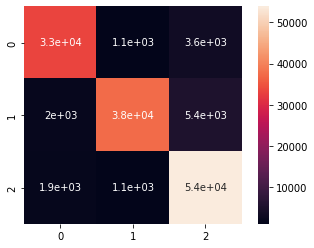

In [44]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# plot the confusion matrix
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
plt.imshow(conf_mat, cmap='binary')
plt.show()

In [45]:
conf_mat

array([[33316,  1132,  3562],
       [ 1982, 37585,  5444],
       [ 1926,  1142, 53905]])

#Support Vector Machine

In [46]:
#SVM
# Train a linear SVM classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# Make predictions on the testing set
predictions = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

train_text, test_text, train_cat, test_cat = train_test_split(gh['text'],gh['polarity'], test_size = 0.20, random_state = 42)

Accuracy:  0.9755275226081118


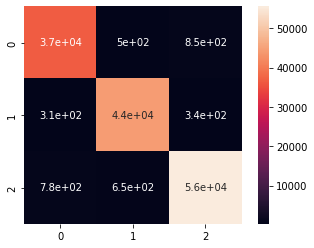

In [48]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# plot the confusion matrix
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
plt.imshow(conf_mat, cmap='binary')
plt.show()

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Calculate AUC
try:
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, predictions)
    print("AUC:", auc)
except:
    print("AUC is not applicable for this problem")

# Calculate precision, recall, and F-Measure
print(classification_report(y_test, predictions))



Accuracy: 0.9755275226081118
AUC is not applicable for this problem
              precision    recall  f1-score   support

    negative       0.97      0.96      0.97     38010
     neutral       0.97      0.99      0.98     45011
    positive       0.98      0.97      0.98     56973

    accuracy                           0.98    139994
   macro avg       0.97      0.98      0.97    139994
weighted avg       0.98      0.98      0.98    139994



In [ ]:
#Machine Learning classification
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 1744
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 254
# This is fixed.
EMBEDDING_DIM = 100
#Tokenization for deep learning
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(gh['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 111838 unique tokens.


In [ ]:
#Truncate and pad the input sequences so that they are all in the same length for modeling
X = tokenizer.texts_to_sequences(gh['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

 

#Converting categorical labels to numbers
Y = pd.get_dummies(gh['polarity']).values
print('Shape of label tensor:', Y.shape)


Shape of data tensor: (699967, 254)
Shape of label tensor: (699967, 3)


In [ ]:
#Splitting of data to 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(577457, 254) (577457, 3)
(144365, 254) (144365, 3)


#LSTM MODEL


In [ ]:
#lstm model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 

epochs = 10
batch_size = 64

 

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

 


Epoch 1/10
8121/8121 [==============================] - 12552s 2s/step - loss: 0.2843 - accuracy: 0.8981 - val_loss: 0.2047 - val_accuracy: 0.9293
Epoch 2/10
5833/8121 [====================>.........] - ETA: 58:35 - loss: 0.2036 - accuracy: 0.9297

In [ ]:

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

 

#test new data with new complaint
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:

import numpy as np


# Evaluating the model

from sklearn.metrics import confusion_matrix, classification_report


Predict = model.predict(X_test)


Y_pred = np.argmax(Predict, axis=1)
Y_true = np.argmax(Y_test,  axis=1)



#evaluation
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(Y_true, Y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title('Confusion matrix')
plt.show()

cf_matrix = confusion_matrix(Y_true, Y_pred)
sns.heatmap(cf_matrix, annot=True)



print("\n Classification Report:")
target_classes = ['No event 0 (-)', 'Event 1 (+)', 'Event 2 (+)']
print(classification_report(Y_true, Y_pred, target_names=target_classes))
print(classification_report(Y_true, Y_pred))



In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
# Create DataFrame
dfmetrics = pd.DataFrame({"Naive Bayes":[89,90, 89,89 ],
                   "SVM":[97, 98, 98,97],
                   "LSTM":[98, 99, 98,98]},
                  index = ["Accuracy", "Precision", "Recall", "F1-Score"])

In [ ]:
# Create unstacked multiple columns bar
dfmetrics.plot(kind="bar", figsize = (8, 4),  title="Sentiment Analysis Model Performance")

#**CREATING WORD CLOUD FOR COMBINED ELECTION TWEETS**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("/content/cloud.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(gh["text"].values)

Output hidden; open in https://colab.research.google.com to view.

#**EXPLORATORY ANALYSIS FOR ALL TWEETS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#TIMESERIES FOR ALL COMBINED TWEETS

In [ ]:
timeseries = df['tweet_created_at'].dropna()

In [ ]:
timeseries 


0         Fri Nov 11 16:56:43 +0000 2022
2         Fri Nov 11 16:56:49 +0000 2022
4         Fri Nov 11 16:56:53 +0000 2022
6         Fri Nov 11 16:56:59 +0000 2022
8         Fri Nov 11 16:57:09 +0000 2022
                       ...              
536266    Fri Nov 25 03:12:11 +0000 2022
536268    Fri Nov 25 03:12:12 +0000 2022
536270    Fri Nov 25 03:12:15 +0000 2022
536272    Fri Nov 25 03:12:15 +0000 2022
536274    Fri Nov 25 03:12:19 +0000 2022
Name: tweet_created_at, Length: 264081, dtype: object

In [ ]:
#PLOT NUMBER OF TWEET AGAINST TWEET CREATED DATE
df['DateNew'] = pd.to_datetime(timeseries, errors='coerce').dt.date
df['Time'] = pd.to_datetime(timeseries, errors='coerce').dt.time

df.head(5)


<ipython-input-73-1673428f9d40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateNew'] = pd.to_datetime(timeseries, errors='coerce').dt.date
<ipython-input-73-1673428f9d40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(timeseries, errors='coerce').dt.time


,hashtags,text,user,user_location,source_device,user_created_at,user_followers_count,user_following_count,user_verified,tweet_place,tweet_geo,tweet_created_at,DateNew,Time
0,[],RT @Rasheethe: FLASH: The PPD Presidential Can...,Astambaya,"Gusau, Kaduna, Nigeria","<a href=""http://twitter.com/download/android"" ...",Mon Apr 01 19:12:52 +0000 2013,4427.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:43 +0000 2022,2022-11-11,16:56:43
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],"RT @Naija_PR: Atiku Abubakar, Bukola Saraki an...",AothmanL,"Gusau, Nigeria Lome","<a href=""http://twitter.com/download/iphone"" r...",Fri Apr 06 13:17:47 +0000 2012,489.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:49 +0000 2022,2022-11-11,16:56:49
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],RT @IAOkowa: Alongside our Presidential Candid...,am_BinHamzat,Nigeria,"<a href=""http://twitter.com/download/android"" ...",Wed Dec 04 13:30:27 +0000 2019,5813.0,NaN,0.0,NaN,NaN,Fri Nov 11 16:56:53 +0000 2022,2022-11-11,16:56:53


In [ ]:
df = df[~df.index.duplicated()]

In [ ]:
nc=df.groupby('DateNew').size().reset_index(name='tweet_volume')

nc.head(15)
nc=nc.iloc[:60,::]
nc


,DateNew,tweet_volume
0,2022-11-03,3
1,2022-11-05,305
2,2022-11-07,1962
3,2022-11-09,5273
4,2022-11-11,2800
5,2022-11-12,1197
6,2022-11-13,232
7,2022-11-23,2302
8,2022-11-24,40345
9,2022-11-25,5305


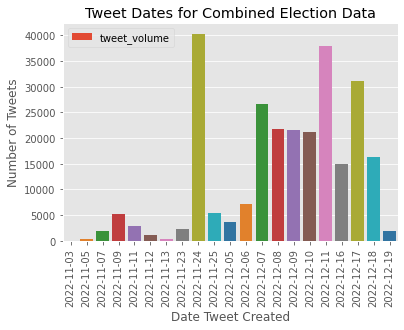

In [ ]:
nc.plot.bar(x='DateNew', y="tweet_volume", rot=90, title="Tweet Dates for Combined Election Data")


#Using Seaborn
axc=sns.barplot(x='DateNew', y='tweet_volume', data=nc, palette='tab10')

plt.xlabel('Date Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

Time Series for  (Tweet Time)

In [ ]:
tmC=df.groupby('Time').size().reset_index(name='tweet_volume')

tmC.head(15)
tmC=tmC.iloc[:60,::]
tmC


,Time,tweet_volume
0,00:00:00,3
1,00:00:01,3
2,00:00:03,1
3,00:00:04,2
4,00:00:05,2
5,00:00:06,3
6,00:00:08,3
7,00:00:10,3
8,00:00:11,3
9,00:00:13,3


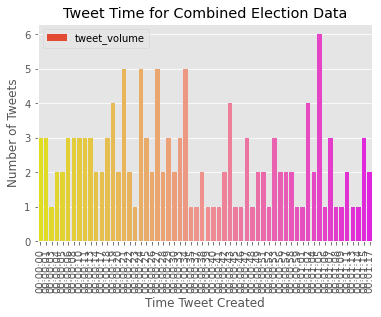

In [ ]:
tmC.plot.bar(x='Time', y="tweet_volume", rot=90, title="Tweet Time for Combined Election Data")


#Using Seaborn
ax=sns.barplot(x='Time', y='tweet_volume', data=tmC, palette='spring_r')

plt.xlabel('Time Tweet Created')
plt.ylabel('Number of Tweets')
plt.show(block=True)

USER CREATED DATES FOR COMBINED TWEETS

#TWEET DEVICES FOR COMBINED TWEETS

In [ ]:
#TWEET DEVICES FOR ALL ELECTION DATA

# Prepare Data
def fill_column(x):
    if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        return 'Iphone'
    elif x== '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>':
        return 'Andrioid'
    elif x == '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>':
        return 'Web'
    else:
        return 'Others'


In [ ]:
df['source_device']

0         <a href="http://twitter.com/download/android" ...
1                                                       NaN
2         <a href="http://twitter.com/download/iphone" r...
3                                                       NaN
4         <a href="http://twitter.com/download/android" ...
                                ...                        
414641    <a href="http://twitter.com/download/android" ...
414642                                                  NaN
414643    <a href="http://twitter.com/download/iphone" r...
414644                                                  NaN
414645    <a href="http://twitter.com/download/android" ...
Name: source_device, Length: 1395897, dtype: object

In [ ]:
devices = df['source_device'].dropna()

In [ ]:
#PLOT DEVICES

df['source_device'] = df['source_device'].apply(fill_column)
df1 = df.groupby('source_device').size().reset_index(name='counts')
n = df1['source_device'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)



In [ ]:
dev=df.groupby(df['source_device']).size().reset_index(name='tweet_count')

dev.head(15)
dev=dev.iloc[:60,::]
dev

,source_device,tweet_count
0,Andrioid,469251
1,Iphone,171975
2,Others,711909
3,Web,42762


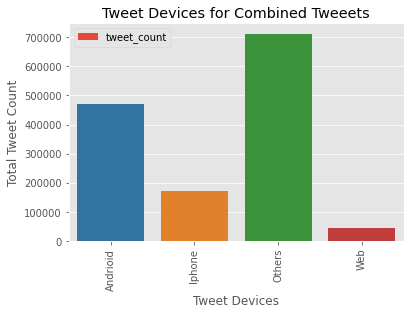

In [ ]:
dev.plot.bar(x='source_device', y="tweet_count", rot=90, title="Tweet Devices for Combined Tweeets")


#Using Seaborn
ax=sns.barplot(x='source_device', y='tweet_count', data=dev, palette='tab10')

plt.xlabel('Tweet Devices')
plt.ylabel('Total Tweet Count')
plt.show(block=True)

[Text(0.5, 1.0, 'Tweet Devices for Peter Obi Tweeets')]

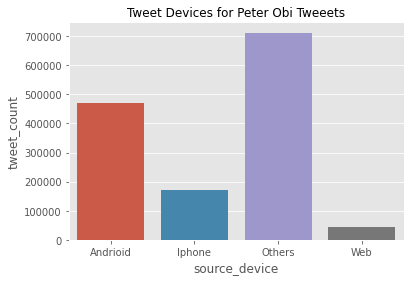

In [ ]:
p=sns.barplot(x='source_device', y='tweet_count', data=dev, ci=None,)
sns.set(rc = {'figure.figsize':(15,6)})

p.set(title="Tweet Devices for Combined Tweeets")

[Text(0.5, 1.0, 'Tweet Devices for Combined Tweeets')]

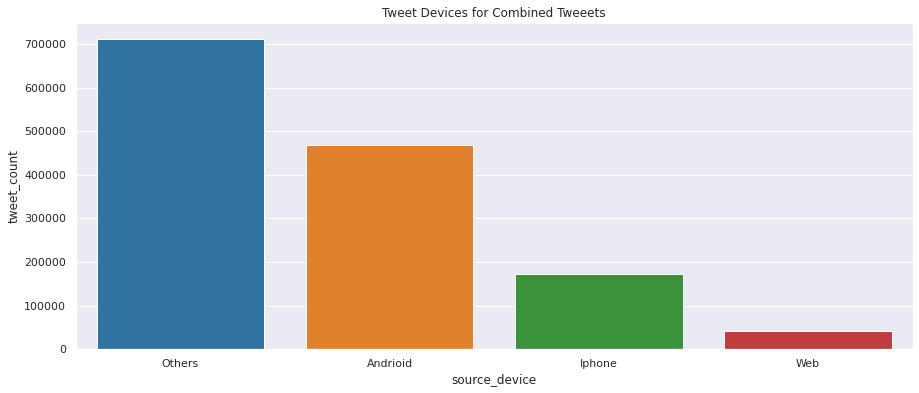

In [ ]:
pdev=sns.barplot(x='source_device', y='tweet_count', data=dev,ci=None,order=dev.sort_values('tweet_count', ascending=False).source_device , palette='tab10')
sns.set(rc = {'figure.figsize':(15,6)})
pdev.set(title="Tweet Devices for Combined Tweeets")

In [ ]:
devType=dev['source_device']
Total=dev['tweet_count']
explode=[0.1,0.1,0.1,0.1,]

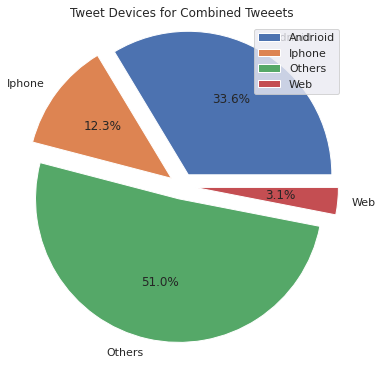

In [ ]:
plt.pie(Total, labels = devType,radius=1.1, autopct='%2.1f%%', explode=explode)
plt.title('Tweet Devices for Combined Tweeets')
plt.legend(devType)
plt.show()

#VERIFIED DEVICES FOR COMBINED TWEETS

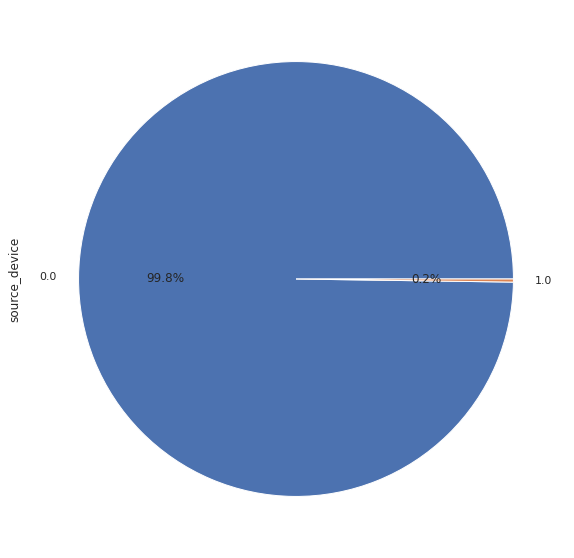

In [ ]:
#PLOTTING VERIFIED AND UNVERIFIED USERS
df.groupby(['user_verified'])['source_device'].count().plot.pie(figsize=(10,10),autopct='%1.1f%%')


In [ ]:
vef=df.groupby(df['user_verified']).size().reset_index(name='tweet_count')

In [ ]:
vefType=vef['user_verified']
Totalvef=vef['tweet_count']
explode=[0,0,0,0.1,0]

vef.head(15)
vef=vef.iloc[:60,::]
vef

,user_verified,tweet_count
0,0.0,692310
1,1.0,1582
